## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 加载数据

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape((train_images.shape[0], num_pixels)).astype('float32') / 255.
test_images = test_images.reshape((test_images.shape[0], num_pixels)).astype('float32') / 255.

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [5]:
num_classes = train_labels.shape[1]

## 定义模型

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'),
    keras.layers.Dense(num_classes, kernel_initializer='normal', activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## 损失和优化

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 开始训练

In [8]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2775 - accuracy: 0.9227 - val_loss: 0.1347 - val_accuracy: 0.9585
Epoch 2/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1101 - accuracy: 0.9685 - val_loss: 0.0971 - val_accuracy: 0.9691
Epoch 3/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0696 - accuracy: 0.9805 - val_loss: 0.0845 - val_accuracy: 0.9730
Epoch 4/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0487 - accuracy: 0.9863 - val_loss: 0.0734 - val_accuracy: 0.9783
Epoch 5/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0366 - accuracy: 0.9897 - val_loss: 0.0611 - val_accuracy: 0.9806
Epoch 6/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0267 - accuracy: 0.9931 - val_loss: 0.0692 - val_accuracy: 0.9784
Epoch 7/10
60000/60000 [==============================] 

## 梯度图

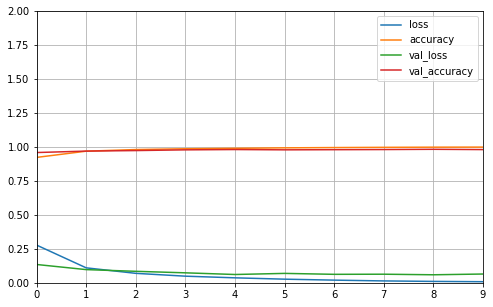

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
    
plot_learning_curves(history)

## 测试

In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.0646 - accuracy: 0.9802


[0.06459158347079647, 0.98020005]

## 保存

In [11]:
model.save('./save/save_model/model.h5')

In [12]:
model.save_weights('./save/save_weights/model_weights.h5')